### 탐구주제 : 1년 후 초등학교 입학생 예측하기
---
#### 사용 데이터 : 전국 어린이집/유치원 원생 데이터
#### 기법 : Clustering, DL

##### 1. 데이터 EDA
- 경로 설정

In [197]:
import pandas as pd
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
## 파일 경로 정의
my_path = os.getcwd()
chodeung_path = os.path.join(my_path, '초등학교')
save_path = os.path.join(my_path, '새어린이집')

def kid_path(year:int):
    return os.path.join(my_path, '어린이집', str(year))

def get_file_path(path:str, number:int, printok=True):
    file_path = os.path.join(path, os.listdir(path)[number])
    if printok:
        print(file_path.replace('zNex~$hare',''))
    return file_path.replace('zNex~$hare','')

- (어린이집) 위도, 경도 확인 시 사용할 수 있는 데이터는 2020부터

In [13]:
pd.read_excel(get_file_path(kid_path(2019), 0), engine='xlrd')[['위도', '경도']]

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2019\[강원]어린이집기본정보조회(정기)-기준일(20190228).xls


,위도,경도
0,38.0,128.0
1,38.0,128.0
2,38.0,128.0
3,38.0,128.0
4,38.0,128.0
...,...,...
1494,38.0,129.0
1495,38.0,129.0
1496,38.0,129.0
1497,38.0,129.0


In [14]:
pd.read_excel(get_file_path(kid_path(2020), 0), engine='xlrd')[['위도', '경도']]

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2020\[강원]어린이집기본정보조회(정기)-기준일(20200229).xls


,위도,경도
0,37.854010,127.721182
1,37.911809,127.723575
2,37.847636,127.746789
3,37.873014,127.751143
4,37.852052,127.737222
...,...,...
1530,38.078721,128.618910
1531,38.076243,128.620193
1532,38.079750,128.641499
1533,38.077208,128.619937


- (어린이집) 데이터 확인
    - 이름

- 강원도

In [15]:
for i in range(2020, 2025):
    print(pd.read_excel(get_file_path(kid_path(i), 0), engine='xlrd')['시도'].value_counts().index)

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2020\[강원]어린이집기본정보조회(정기)-기준일(20200229).xls
Index(['강원도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2021\[강원]어린이집기본정보조회(정기)-기준일(20210228).xls
Index(['강원도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2022\[강원]어린이집기본정보조회(정기)-기준일(20220228).xls
Index(['강원도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2023\[강원]어린이집기본정보조회(정기)-기준일(20230228).xls
Index(['강원도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2024\[강원]어린이집기본정보조회(정기)-기준일(20240229).xls
Index(['강원특별자치도'], dtype='object', name='시도')


- 경기도

In [16]:
for i in range(2020, 2025):
    print(pd.read_excel(get_file_path(kid_path(i), 1), engine='xlrd')['시도'].value_counts().index)

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2020\[경기]어린이집기본정보조회(정기)-기준일(20200229).xls
Index(['경기도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2021\[경기]어린이집기본정보조회(정기)-기준일(20210228).xls
Index(['경기도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2022\[경기]어린이집기본정보조회(정기)-기준일(20220228).xls
Index(['경기도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2023\[경기]어린이집기본정보조회(정기)-기준일(20230228).xls
Index(['경기도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2024\[경기]어린이집기본정보조회(정기)-기준일(20240229).xls
Index(['경기도'], dtype='object', name='시도')


- 경상남도

In [17]:
for i in range(2020, 2025):
    print(pd.read_excel(get_file_path(kid_path(i), 2), engine='xlrd')['시도'].value_counts().index)

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2020\[경남]어린이집기본정보조회(정기)-기준일(20200229).xls
Index(['경상남도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2021\[경남]어린이집기본정보조회(정기)-기준일(20210228).xls
Index(['경상남도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2022\[경남]어린이집기본정보조회(정기)-기준일(20220228).xls
Index(['경상남도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2023\[경남]어린이집기본정보조회(정기)-기준일(20230228).xls
Index(['경상남도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2024\[경남]어린이집기본정보조회(정기)-기준일(20240229).xls
Index(['경상남도'], dtype='object', name='시도')


- 경상북도

In [18]:
for i in range(2020, 2025):
    print(pd.read_excel(get_file_path(kid_path(i), 3), engine='xlrd')['시도'].value_counts().index)

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2020\[경북]어린이집기본정보조회(정기)-기준일(20200229).xls
Index(['경상북도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2021\[경북]어린이집기본정보조회(정기)-기준일(20210228).xls
Index(['경상북도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2022\[경북]어린이집기본정보조회(정기)-기준일(20220228).xls
Index(['경상북도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2023\[경북]어린이집기본정보조회(정기)-기준일(20230228).xls
Index(['경상북도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2024\[경북]어린이집기본정보조회(정기)-기준일(20240229).xls
Index(['경상북도'], dtype='object', name='시도')


- 광주광역시

In [19]:
for i in range(2020, 2025):
    print(pd.read_excel(get_file_path(kid_path(i), 4), engine='xlrd')['시도'].value_counts().index)

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2020\[광주]어린이집기본정보조회(정기)-기준일(20200229).xls
Index(['광주광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2021\[광주]어린이집기본정보조회(정기)-기준일(20210228).xls
Index(['광주광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2022\[광주]어린이집기본정보조회(정기)-기준일(20220228).xls
Index(['광주광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2023\[광주]어린이집기본정보조회(정기)-기준일(20230228).xls
Index(['광주광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2024\[광주]어린이집기본정보조회(정기)-기준일(20240229).xls
Index(['광주광역시'], dtype='object', name='시도')


- 대구광역시

In [20]:
for i in range(2020, 2025):
    print(pd.read_excel(get_file_path(kid_path(i), 5), engine='xlrd')['시도'].value_counts().index)

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2020\[대구]어린이집기본정보조회(정기)-기준일(20200229).xls
Index(['대구광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2021\[대구]어린이집기본정보조회(정기)-기준일(20210228).xls
Index(['대구광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2022\[대구]어린이집기본정보조회(정기)-기준일(20220228).xls
Index(['대구광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2023\[대구]어린이집기본정보조회(정기)-기준일(20230228).xls
Index(['대구광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2024\[대구]어린이집기본정보조회(정기)-기준일(20240229).xls
Index(['대구광역시'], dtype='object', name='시도')


- 대전광역시

In [21]:
for i in range(2020, 2025):
    print(pd.read_excel(get_file_path(kid_path(i), 6), engine='xlrd')['시도'].value_counts().index)

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2020\[대전]어린이집기본정보조회(정기)-기준일(20200229).xls
Index(['대전광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2021\[대전]어린이집기본정보조회(정기)-기준일(20210228).xls
Index(['대전광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2022\[대전]어린이집기본정보조회(정기)-기준일(20220228).xls
Index(['대전광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2023\[대전]어린이집기본정보조회(정기)-기준일(20230228).xls
Index(['대전광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2024\[대전]어린이집기본정보조회(정기)-기준일(20240229).xls
Index(['대전광역시'], dtype='object', name='시도')


- 부산광역시

In [22]:
for i in range(2020, 2025):
    print(pd.read_excel(get_file_path(kid_path(i), 7), engine='xlrd')['시도'].value_counts().index)

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2020\[부산]어린이집기본정보조회(정기)-기준일(20200229).xls
Index(['부산광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2021\[부산]어린이집기본정보조회(정기)-기준일(20210228).xls
Index(['부산광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2022\[부산]어린이집기본정보조회(정기)-기준일(20220228).xls
Index(['부산광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2023\[부산]어린이집기본정보조회(정기)-기준일(20230228).xls
Index(['부산광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2024\[부산]어린이집기본정보조회(정기)-기준일(20240229).xls
Index(['부산광역시'], dtype='object', name='시도')


- 서울특별시

In [23]:
for i in range(2020, 2025):
    print(pd.read_excel(get_file_path(kid_path(i), 8), engine='xlrd')['시도'].value_counts().index)

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2020\[서울]어린이집기본정보조회(정기)-기준일(20200229).xls
Index(['경기도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2021\[서울]어린이집기본정보조회(정기)-기준일(20210228).xls
Index(['서울특별시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2022\[서울]어린이집기본정보조회(정기)-기준일(20220228).xls
Index(['서울특별시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2023\[서울]어린이집기본정보조회(정기)-기준일(20230228).xls
Index(['서울특별시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2024\[서울]어린이집기본정보조회(정기)-기준일(20240229).xls
Index(['서울특별시'], dtype='object', name='시도')


- 세종특별자치시

In [24]:
for i in range(2020, 2025):
    print(pd.read_excel(get_file_path(kid_path(i), 9), engine='xlrd')['시도'].value_counts().index)

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2020\[세종]어린이집기본정보조회(정기)-기준일(20200229).xls
Index(['세종특별자치시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2021\[세종]어린이집기본정보조회(정기)-기준일(20210228).xls
Index(['세종특별자치시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2022\[세종]어린이집기본정보조회(정기)-기준일(20220228).xls
Index(['세종특별자치시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2023\[세종]어린이집기본정보조회(정기)-기준일(20230228).xls
Index(['세종특별자치시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2024\[세종]어린이집기본정보조회(정기)-기준일(20240229).xls
Index(['세종특별자치시'], dtype='object', name='시도')


- 울산광역시

In [25]:
for i in range(2020, 2025):
    print(pd.read_excel(get_file_path(kid_path(i), 10), engine='xlrd')['시도'].value_counts().index)

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2020\[울산]어린이집기본정보조회(정기)-기준일(20200229).xls
Index(['울산광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2021\[울산]어린이집기본정보조회(정기)-기준일(20210228).xls
Index(['울산광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2022\[울산]어린이집기본정보조회(정기)-기준일(20220228).xls
Index(['울산광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2023\[울산]어린이집기본정보조회(정기)-기준일(20230228).xls
Index(['울산광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2024\[울산]어린이집기본정보조회(정기)-기준일(20240229).xls
Index(['울산광역시'], dtype='object', name='시도')


- 인천광역시

In [26]:
for i in range(2020, 2025):
    print(pd.read_excel(get_file_path(kid_path(i), 11), engine='xlrd')['시도'].value_counts().index)

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2020\[인천]어린이집기본정보조회(정기)-기준일(20200229).xls
Index(['인천광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2021\[인천]어린이집기본정보조회(정기)-기준일(20210228).xls
Index(['인천광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2022\[인천]어린이집기본정보조회(정기)-기준일(20220228).xls
Index(['인천광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2023\[인천]어린이집기본정보조회(정기)-기준일(20230228).xls
Index(['인천광역시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2024\[인천]어린이집기본정보조회(정기)-기준일(20240229).xls
Index(['인천광역시'], dtype='object', name='시도')


- 전라남도

In [27]:
for i in range(2020, 2025):
    print(pd.read_excel(get_file_path(kid_path(i), 12), engine='xlrd')['시도'].value_counts().index)

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2020\[전남]어린이집기본정보조회(정기)-기준일(20200229).xls
Index(['전라남도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2021\[전남]어린이집기본정보조회(정기)-기준일(20210228).xls
Index(['전라남도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2022\[전남]어린이집기본정보조회(정기)-기준일(20220228).xls
Index(['서울특별시'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2023\[전남]어린이집기본정보조회(정기)-기준일(20230228).xls
Index(['전라남도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2024\[전남]어린이집기본정보조회(정기)-기준일(20240229).xls
Index(['전라남도'], dtype='object', name='시도')


- 전라북도

In [28]:
for i in range(2020, 2025):
    print(pd.read_excel(get_file_path(kid_path(i), 13), engine='xlrd')['시도'].value_counts().index)

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2020\[전북]어린이집기본정보조회(정기)-기준일(20200229).xls
Index(['전라북도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2021\[전북]어린이집기본정보조회(정기)-기준일(20210228).xls
Index(['전라북도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2022\[전북]어린이집기본정보조회(정기)-기준일(20220228).xls
Index(['전라북도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2023\[전북]어린이집기본정보조회(정기)-기준일(20230228).xls
Index(['전라북도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2024\[전북]어린이집기본정보조회(정기)-기준일(20240229).xls
Index(['전북특별자치도'], dtype='object', name='시도')


- 제주특별자치시

In [29]:
for i in range(2020, 2025):
    print(pd.read_excel(get_file_path(kid_path(i), 14), engine='xlrd')['시도'].value_counts().index)

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2020\[제주]어린이집기본정보조회(정기)-기준일(20200229).xls
Index(['제주도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2021\[제주]어린이집기본정보조회(정기)-기준일(20210228).xls
Index(['제주도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2022\[제주]어린이집기본정보조회(정기)-기준일(20220228).xls
Index(['제주도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2023\[제주]어린이집기본정보조회(정기)-기준일(20230228).xls
Index(['제주도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2024\[제주]어린이집기본정보조회(정기)-기준일(20240229).xls
Index(['제주도'], dtype='object', name='시도')


- 충청남도

In [30]:
for i in range(2020, 2025):
    print(pd.read_excel(get_file_path(kid_path(i), 15), engine='xlrd')['시도'].value_counts().index)

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2020\[충남]어린이집기본정보조회(정기)-기준일(20200229).xls
Index(['충청남도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2021\[충남]어린이집기본정보조회(정기)-기준일(20210228).xls
Index(['충청남도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2022\[충남]어린이집기본정보조회(정기)-기준일(20220228).xls
Index(['충청남도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2023\[충남]어린이집기본정보조회(정기)-기준일(20230228).xls
Index(['충청남도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2024\[충남]어린이집기본정보조회(정기)-기준일(20240229).xls
Index(['충청남도'], dtype='object', name='시도')


- 충청북도

In [31]:
for i in range(2020, 2025):
    print(pd.read_excel(get_file_path(kid_path(i), 16), engine='xlrd')['시도'].value_counts().index)

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2020\[충북]어린이집기본정보조회(정기)-기준일(20200229).xls
Index(['충청북도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2021\[충북]어린이집기본정보조회(정기)-기준일(20210228).xls
Index(['충청북도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2022\[충북]어린이집기본정보조회(정기)-기준일(20220228).xls
Index(['충청북도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2023\[충북]어린이집기본정보조회(정기)-기준일(20230228).xls
Index(['충청북도'], dtype='object', name='시도')
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2024\[충북]어린이집기본정보조회(정기)-기준일(20240229).xls
Index(['충청북도'], dtype='object', name='시도')


- (어린이집) 시도별 데이터 시도 이상없음!

---

- (어린이집) 위도, 경도 기준 데이터 중복확인

In [32]:
pd.read_excel(get_file_path(kid_path(2020), 0), engine='xlrd')[['위도', '경도']].value_counts()

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2020\[강원]어린이집기본정보조회(정기)-기준일(20200229).xls


위도         경도        
37.566470  126.977963    23
37.323412  127.951421     6
37.891090  127.755466     6
37.335788  127.926181     6
37.317493  127.965461     5
                         ..
37.450347  129.187539     1
37.450214  129.170450     1
37.450074  129.166034     1
37.449821  129.175446     1
38.495819  128.426403     1
Name: count, Length: 1276, dtype: int64

In [33]:
pd.read_excel(get_file_path(kid_path(2021), 0), engine='xlrd')[['위도', '경도']].value_counts()

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2021\[강원]어린이집기본정보조회(정기)-기준일(20210228).xls


위도         경도        
37.566470  126.977963    32
37.891090  127.755466     6
37.335788  127.926181     6
37.323412  127.951421     5
37.334693  127.963942     5
                         ..
37.448902  129.168191     1
37.448492  129.169856     1
37.447999  129.164906     1
37.447940  129.177145     1
38.495819  128.426403     1
Name: count, Length: 1305, dtype: int64

In [34]:
pd.read_excel(get_file_path(kid_path(2022), 0), engine='xlrd')[['위도', '경도']].value_counts()

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2022\[강원]어린이집기본정보조회(정기)-기준일(20220228).xls


위도         경도        
37.566470  126.977963    34
37.891090  127.755466     6
37.335788  127.926181     6
37.323412  127.951421     5
37.334693  127.963942     5
                         ..
37.448492  129.169856     1
37.447999  129.164906     1
37.447940  129.177145     1
37.447426  129.177378     1
38.947084  123.364601     1
Name: count, Length: 1333, dtype: int64

In [35]:
pd.read_excel(get_file_path(kid_path(2023), 0), engine='xlrd')[['위도', '경도']].value_counts()

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2023\[강원]어린이집기본정보조회(정기)-기준일(20230228).xls


위도         경도        
37.566470  126.977963    7
37.891090  127.755466    6
37.335788  127.926181    6
38.190079  128.578387    5
37.323412  127.951421    5
                        ..
37.446621  129.162893    1
37.446169  129.173797    1
37.445867  129.177022    1
37.445679  129.171197    1
38.947084  123.364601    1
Name: count, Length: 1387, dtype: int64

In [36]:
pd.read_excel(get_file_path(kid_path(2024), 0), engine='xlrd')[['위도', '경도']].value_counts()

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2024\[강원]어린이집기본정보조회(정기)-기준일(20240229).xls


위도         경도        
37.566470  126.977963    8
37.335788  127.926181    6
37.891090  127.755466    6
38.190079  128.578387    5
37.334693  127.963942    5
                        ..
37.444998  129.174504    1
37.444877  129.175483    1
37.443744  129.175963    1
37.443642  129.176653    1
38.947084  123.364601    1
Name: count, Length: 1403, dtype: int64

In [37]:
gangwon_2020 = pd.read_excel(get_file_path(kid_path(2020), 0), engine='xlrd')
display(gangwon_2020[(gangwon_2020['위도'] == 37.566470) & (gangwon_2020['경도'] == 126.977963)][['어린이집명', '주소']])
gangwon_2020[(gangwon_2020['위도'] == 37.566470) & (gangwon_2020['경도'] == 126.977963)].groupby('시군구')['시군구'].count()

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\어린이집\2020\[강원]어린이집기본정보조회(정기)-기준일(20200229).xls


,어린이집명,주소
321,강원경찰청어린이집,강원도 춘천시 동면 만천로143번길 84
330,후평트루엘어린이집,강원도 춘천시 백령로 215 일성트루엘더퍼스트 관리동
331,퇴계이편한어린이집,강원도 춘천시 안마산로 133 이편한세상 춘천한숲시티 관리동
764,힐데스어린이집,"강원도 원주시 혁신로 91 509동 101호(반곡동,힐데스하임)"
769,미래코어린이집,"강원도 원주시 세계로 2 (반곡동, 한국광해관리공단)"
771,건강보험심사평가원어린이집,강원도 원주시 입춘로 130
783,만도원주어린이집,강원도 원주시 문막읍 왕건로 114 만도사원아파트 106동109~110호
786,원주세브란스어린이집,"강원도 원주시 일산로 20 (일산동,연세대학교 원주의과대학기독병원)"
802,휴먼시아별그린어린이집,강원도 원주시 개운로 30 개운1단지휴먼시아아파트 관리동
808,조은어린이집,"강원도 원주시 번재길 32 110동 (행구동, 효성백년가약아파트)"


시군구
강릉시    5
삼척시    3
속초시    2
원주시    7
인제군    1
춘천시    3
태백시    1
평창군    1
Name: 시군구, dtype: int64

- 데이터 자체에 오류가 있는듯하다

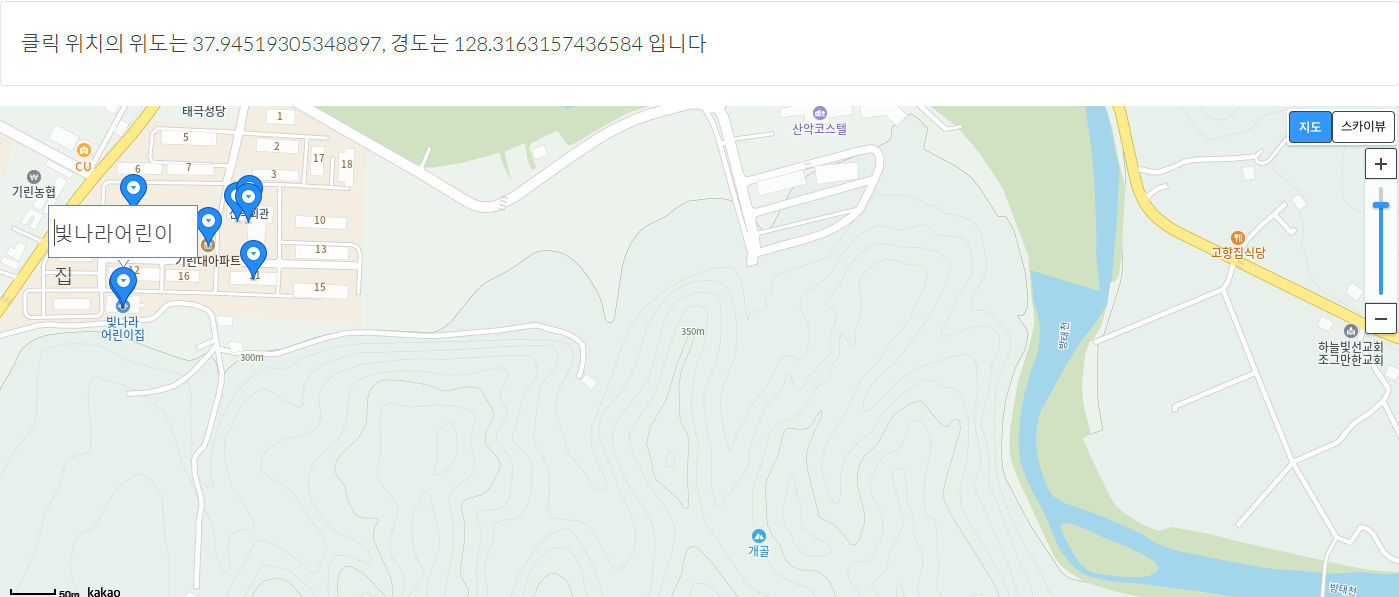

- (어린이집) 어떻게 주소 기반으로 위도, 경도를 조정할 것인가?
    - 데이터별 위도 경도 중복 건수를 찾아보고자 한다.

In [38]:
order = ['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북']

In [39]:
count_dict = {}
for i in range(2020, 2025):
    for j in range(len(order)):
        table = pd.read_excel(get_file_path(kid_path(i), j, printok=False), engine='xlrd')[['위도', '경도']].value_counts()
        print("{0}년 {1}의 위도, 경도 중복건수는 {2}".format(i, order[j], table[table > 1].sum()))
        count_dict[str(i) + '년 ' + order[j]] = table[table > 1].sum()

2020년 강원의 위도, 경도 중복건수는 307
2020년 경기의 위도, 경도 중복건수는 6079
2020년 경남의 위도, 경도 중복건수는 1734
2020년 경북의 위도, 경도 중복건수는 678
2020년 광주의 위도, 경도 중복건수는 463
2020년 대구의 위도, 경도 중복건수는 459
2020년 대전의 위도, 경도 중복건수는 870
2020년 부산의 위도, 경도 중복건수는 561
2020년 서울의 위도, 경도 중복건수는 55
2020년 세종의 위도, 경도 중복건수는 126
2020년 울산의 위도, 경도 중복건수는 238
2020년 인천의 위도, 경도 중복건수는 896
2020년 전남의 위도, 경도 중복건수는 343
2020년 전북의 위도, 경도 중복건수는 614
2020년 제주의 위도, 경도 중복건수는 30
2020년 충남의 위도, 경도 중복건수는 957
2020년 충북의 위도, 경도 중복건수는 406
2021년 강원의 위도, 경도 중복건수는 315
2021년 경기의 위도, 경도 중복건수는 6012
2021년 경남의 위도, 경도 중복건수는 1707
2021년 경북의 위도, 경도 중복건수는 670
2021년 광주의 위도, 경도 중복건수는 470
2021년 대구의 위도, 경도 중복건수는 467
2021년 대전의 위도, 경도 중복건수는 866
2021년 부산의 위도, 경도 중복건수는 552
2021년 서울의 위도, 경도 중복건수는 2078
2021년 세종의 위도, 경도 중복건수는 120
2021년 울산의 위도, 경도 중복건수는 232
2021년 인천의 위도, 경도 중복건수는 877
2021년 전남의 위도, 경도 중복건수는 337
2021년 전북의 위도, 경도 중복건수는 610
2021년 제주의 위도, 경도 중복건수는 26
2021년 충남의 위도, 경도 중복건수는 947
2021년 충북의 위도, 경도 중복건수는 408
2022년 강원의 위도, 경도 중복건수는 317
2022년 경기의 위도, 경도 중복건수는 5971
2022년 경남의 위도, 경도 중복건수는 17

- (어린이집) 총 79,361건에 대한 중복을 처리해야 한다...

In [40]:
sum(count_dict.values())

79361

In [41]:
count_dict

{'2020년 강원': 307,
 '2020년 경기': 6079,
 '2020년 경남': 1734,
 '2020년 경북': 678,
 '2020년 광주': 463,
 '2020년 대구': 459,
 '2020년 대전': 870,
 '2020년 부산': 561,
 '2020년 서울': 55,
 '2020년 세종': 126,
 '2020년 울산': 238,
 '2020년 인천': 896,
 '2020년 전남': 343,
 '2020년 전북': 614,
 '2020년 제주': 30,
 '2020년 충남': 957,
 '2020년 충북': 406,
 '2021년 강원': 315,
 '2021년 경기': 6012,
 '2021년 경남': 1707,
 '2021년 경북': 670,
 '2021년 광주': 470,
 '2021년 대구': 467,
 '2021년 대전': 866,
 '2021년 부산': 552,
 '2021년 서울': 2078,
 '2021년 세종': 120,
 '2021년 울산': 232,
 '2021년 인천': 877,
 '2021년 전남': 337,
 '2021년 전북': 610,
 '2021년 제주': 26,
 '2021년 충남': 947,
 '2021년 충북': 408,
 '2022년 강원': 317,
 '2022년 경기': 5971,
 '2022년 경남': 1701,
 '2022년 경북': 675,
 '2022년 광주': 477,
 '2022년 대구': 463,
 '2022년 대전': 873,
 '2022년 부산': 549,
 '2022년 서울': 2034,
 '2022년 세종': 120,
 '2022년 울산': 231,
 '2022년 인천': 881,
 '2022년 전남': 53,
 '2022년 전북': 605,
 '2022년 제주': 26,
 '2022년 충남': 942,
 '2022년 충북': 403,
 '2023년 강원': 291,
 '2023년 경기': 5807,
 '2023년 경남': 1640,
 '2023년 경북': 640,
 '202

- (어린이집) 카카오맵 api 요청하여 위도, 경도 받기

In [69]:
import requests, json

def get_location(address):
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + address
    headers = {"Authorization": "KakaoAK "}
    api_json = json.loads(str(requests.get(url,headers=headers).text))
    return api_json

- 크롤링 코드
    - 사전 주소 결측치 확인

In [44]:
address_null_count = 0
for i in range(2020, 2025):
    for j in range(len(order)):
        table = pd.read_excel(get_file_path(kid_path(i), j, printok=False), engine='xlrd')
        print('{0}년도 {1}의 주소 컬럼 결측치 : {2}'.format(i, order[j], table['주소'].isnull().sum()))
        address_null_count += table['주소'].isnull().sum()

print("전체 주소 컬럼 결측치 개수 : ", address_null_count)

2020년도 강원의 주소 컬럼 결측치 : 0
2020년도 경기의 주소 컬럼 결측치 : 0
2020년도 경남의 주소 컬럼 결측치 : 0
2020년도 경북의 주소 컬럼 결측치 : 0
2020년도 광주의 주소 컬럼 결측치 : 0
2020년도 대구의 주소 컬럼 결측치 : 0
2020년도 대전의 주소 컬럼 결측치 : 0
2020년도 부산의 주소 컬럼 결측치 : 0
2020년도 서울의 주소 컬럼 결측치 : 0
2020년도 세종의 주소 컬럼 결측치 : 0
2020년도 울산의 주소 컬럼 결측치 : 0
2020년도 인천의 주소 컬럼 결측치 : 0
2020년도 전남의 주소 컬럼 결측치 : 0
2020년도 전북의 주소 컬럼 결측치 : 0
2020년도 제주의 주소 컬럼 결측치 : 0
2020년도 충남의 주소 컬럼 결측치 : 0
2020년도 충북의 주소 컬럼 결측치 : 0
2021년도 강원의 주소 컬럼 결측치 : 0
2021년도 경기의 주소 컬럼 결측치 : 0
2021년도 경남의 주소 컬럼 결측치 : 0
2021년도 경북의 주소 컬럼 결측치 : 0
2021년도 광주의 주소 컬럼 결측치 : 0
2021년도 대구의 주소 컬럼 결측치 : 0
2021년도 대전의 주소 컬럼 결측치 : 0
2021년도 부산의 주소 컬럼 결측치 : 0
2021년도 서울의 주소 컬럼 결측치 : 0
2021년도 세종의 주소 컬럼 결측치 : 0
2021년도 울산의 주소 컬럼 결측치 : 0
2021년도 인천의 주소 컬럼 결측치 : 0
2021년도 전남의 주소 컬럼 결측치 : 0
2021년도 전북의 주소 컬럼 결측치 : 0
2021년도 제주의 주소 컬럼 결측치 : 0
2021년도 충남의 주소 컬럼 결측치 : 0
2021년도 충북의 주소 컬럼 결측치 : 0
2022년도 강원의 주소 컬럼 결측치 : 0
2022년도 경기의 주소 컬럼 결측치 : 0
2022년도 경남의 주소 컬럼 결측치 : 0
2022년도 경북의 주소 컬럼 결측치 : 0
2022년도 광주의 주소 컬럼 결측치 : 0
2022년도 대구의 주소 컬럼 결측치 : 0


In [45]:
get_location('강원도 춘천시 동면 만천로143번길 84')

{'errorType': 'AccessDeniedError',
 'message': 'cannot find Authorization : KakaoAK header'}

In [46]:
for i in range(2020, 2025):
    for j in range(len(order)):
        
        ## 파일 존재 시 다음 파일
        if os.path.isfile(os.path.join(save_path, get_file_path(kid_path(i), j, printok=False).replace(os.path.join(kid_path(i),""), "")).replace('.xls','.xlsx')):
            continue
        
        # 파일 불러오기
        table = pd.read_excel(get_file_path(kid_path(i), j, printok=False), engine='xlrd')
        new_table = table.copy()
        Duplicated_Series = table[['위도', '경도']].value_counts()
        for k in Duplicated_Series[Duplicated_Series>1].index:
            위도 = k[0]
            경도 = k[1]
            for h in table[(table['위도'] == 위도) & (table['경도']==경도)]['주소']:
                json_data = get_location(h)
                
                if int(json_data['meta']['total_count']) > 0:
                    new_table.loc[table[table['주소'] == h].index, ['위도']] = np.float64(json_data['documents'][0]['address']['y'])
                    new_table.loc[table[table['주소'] == h].index, ['경도']] = np.float64(json_data['documents'][0]['address']['x'])
                else:
                    new_table.loc[table[table['주소'] == h].index, ['위도']] = np.nan
                    new_table.loc[table[table['주소'] == h].index, ['경도']] = np.nan

        table.to_excel(os.path.join(save_path, get_file_path(kid_path(i), j, printok=False).replace(os.path.join(kid_path(i),""), "")).replace('.xls','.xlsx'), sheet_name='sheet1')
        print(get_file_path(kid_path(i), j, printok=False), ' 저장완료')

- 보는 바와 같이 실제 위도와 다른 것을 확인할 수 있다.
- 현재는 핫스팟 환경으로 작업하고 있기에 집에 복귀할 시, 돌려볼 예정이다.
- 작업완료
---

- (초등학교) 현황 데이터 : "정보공시 학교코드", "학교도로명 주소", "위도", "경도"

In [47]:
cho_where = pd.read_csv(get_file_path(chodeung_path, 6))[["정보공시 학교코드", "학교도로명 주소", "위도", "경도"]]
cho_where

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\초등학교\초등학교 현황.csv


,정보공시 학교코드,학교도로명 주소,위도,경도
0,S000003511,서울특별시 서초구 서초중앙로 96,37.490739,127.015424
1,S000003563,서울특별시 종로구 대학로 64,37.577017,127.003091
2,S010000737,서울특별시 강남구 선릉로 29,37.481618,127.058738
3,S010000738,서울특별시 강남구 개포로 401,37.486214,127.057742
4,S010000739,서울특별시 강남구 삼성로4길 30,37.486805,127.069977
...,...,...,...,...
6723,S170000801,제주특별자치도 제주시 남녕로 63,33.492826,126.477950
6724,S170000834,제주특별자치도 제주시 구남동2길 58,33.488121,126.531991
6725,S170000836,제주특별자치도 제주시 화삼로 104,33.514019,126.584301
6726,S170000837,제주특별자치도 제주시 화삼북로2길 27,33.515224,126.577005


- (초등학교) 정보공시 학교코드 중복확인1

In [48]:
cho_where['정보공시 학교코드'].value_counts()

정보공시 학교코드
S000003511    1
S120002557    1
S120002912    1
S120002907    1
S120002897    1
             ..
S090001962    1
S090001961    1
S090001960    1
S090001959    1
S170000839    1
Name: count, Length: 6728, dtype: int64

- (초등학교) 데이터 확인하기(2021~2023) : "정보공시 학교코드", "학교명", "1학년 학생수"

In [49]:
df_list = []

for i in range(3, 6):
    df_list.append(pd.read_csv(get_file_path(chodeung_path, i))[["정보공시 학교코드", "학교명", "1학년 학생수"]])

c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\초등학교\2021년도_학년별·학급별 학생수(초)_전체.csv
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\초등학교\2022년도_학년별·학급별 학생수(초)_전체.csv
c:\Users\MingeeKim\Desktop\개발폴더\Expect_freshman\초등학교\2023년도_학년별·학급별 학생수(초)_전체.csv


- (초등학교) 정보공시 학교코드 중복확인2

In [50]:
df_list[0]['정보공시 학교코드'].value_counts()

정보공시 학교코드
S000003511    1
S120001189    1
S120001180    1
S120001179    1
S120001175    1
             ..
S090001625    1
S090001624    1
S090001622    1
S090001621    1
S170000839    1
Name: count, Length: 6309, dtype: int64

In [51]:
df_list[1]['정보공시 학교코드'].value_counts()

정보공시 학교코드
S000003511    1
S120001164    1
S120001156    1
S120001155    1
S120001154    1
             ..
S090001617    1
S090001616    1
S090001615    1
S090001614    1
S170000839    1
Name: count, Length: 6309, dtype: int64

In [52]:
df_list[2]['정보공시 학교코드'].value_counts()

정보공시 학교코드
S000003511    1
S120001152    1
S120001149    1
S120001146    1
S120001145    1
             ..
S090001612    1
S090001611    1
S090001609    1
S090001608    1
S170000839    1
Name: count, Length: 6307, dtype: int64

- (초등학교) 데이터 조인하기

In [53]:
for j in range(3):
    df_list[j] = pd.merge(df_list[j], cho_where, on='정보공시 학교코드', how='left')

- (초등학교) 널값 확인하기

In [54]:
df_list[0].isnull().sum()

정보공시 학교코드    0
학교명          0
1학년 학생수      0
학교도로명 주소     1
위도           6
경도           6
dtype: int64

In [55]:
df_list[1].isnull().sum()

정보공시 학교코드    0
학교명          0
1학년 학생수      0
학교도로명 주소     1
위도           6
경도           6
dtype: int64

In [56]:
df_list[2].isnull().sum()

정보공시 학교코드    0
학교명          0
1학년 학생수      0
학교도로명 주소     1
위도           6
경도           6
dtype: int64

- (초등학교) 결측치 핸들링하기1 - 학교도로명 주소(직접 취합)

In [57]:
df_list[0][df_list[0].isnull()['학교도로명 주소']]

,정보공시 학교코드,학교명,1학년 학생수,학교도로명 주소,위도,경도
4106,S120000905,송산초등학교,13,NaN,36.932146,126.679896


In [58]:
df_list[1][df_list[1].isnull()['학교도로명 주소']]

,정보공시 학교코드,학교명,1학년 학생수,학교도로명 주소,위도,경도
4113,S120000905,송산초등학교,19,NaN,36.932146,126.679896


In [59]:
df_list[2][df_list[2].isnull()['학교도로명 주소']]

,정보공시 학교코드,학교명,1학년 학생수,학교도로명 주소,위도,경도
4118,S120000905,송산초등학교,15,NaN,36.932146,126.679896


In [60]:
df_list[0][df_list[0]['학교명'].str.contains('송산')]

,정보공시 학교코드,학교명,1학년 학생수,학교도로명 주소,위도,경도
2808,S090004320,송산초등학교,47,경기도 화성시 송산면 사강시장길 15-9,37.214754,126.732491
3126,S090006799,의정부송산초등학교,239,경기도 의정부시 오목로 228,37.746359,127.100609
4106,S120000905,송산초등학교,13,NaN,36.932146,126.679896
5106,S140003279,송산초등학교,16,전라남도 순천시 별량면 송산구기길 13,34.850649,127.415775


- (초등학교) 당진시 송산초등학교 주소 : "충청남도 당진시 시 송산면 상거길 19-1"

In [61]:
df_list[0].loc[[4106], ['학교도로명 주소']] = "충청남도 당진시 송산면 상거길 19-1"
df_list[1].loc[[4113], ['학교도로명 주소']] = "충청남도 당진시 송산면 상거길 19-1"
df_list[2].loc[[4118], ['학교도로명 주소']] = "충청남도 당진시 송산면 상거길 19-1"

In [62]:
df_list[1][df_list[1].isnull()['학교도로명 주소']]

,정보공시 학교코드,학교명,1학년 학생수,학교도로명 주소,위도,경도


In [63]:
df_list[2][df_list[2].isnull()['학교도로명 주소']]

,정보공시 학교코드,학교명,1학년 학생수,학교도로명 주소,위도,경도


- (초등학교) 결측치 핸들링하기2 - 위도, 경도

In [64]:
df_list[0][df_list[0].isnull()['위도']]

,정보공시 학교코드,학교명,1학년 학생수,학교도로명 주소,위도,경도
1068,S030000888,대구비산초등학교,63,대구광역시 서구 통학로 202,NaN,NaN
1087,S030000908,대구평리초등학교,166,대구광역시 서구 국채보상로53길 6-5,NaN,NaN
1896,S090000899,미원초등학교위곡분교장,8,경기도 가평군 설악면 한서로 233,NaN,NaN
3586,S100003736,성원초등학교,97,강원특별자치도 춘천시 승지골길16번길 36,NaN,NaN
4208,S120001169,안흥초등학교,4,충청남도 태안군 근흥면 죽림길 45,NaN,NaN
5794,S160001385,구산초등학교,4,경상남도 창원시 마산합포구 구산면 수정3길 8,NaN,NaN


In [65]:
df_list[1][df_list[1].isnull()['위도']]

,정보공시 학교코드,학교명,1학년 학생수,학교도로명 주소,위도,경도
1070,S030000888,대구비산초등학교,43,대구광역시 서구 통학로 202,NaN,NaN
1089,S030000908,대구평리초등학교,158,대구광역시 서구 국채보상로53길 6-5,NaN,NaN
1903,S090000899,미원초등학교위곡분교장,0,경기도 가평군 설악면 한서로 233,NaN,NaN
3594,S100003736,성원초등학교,98,강원특별자치도 춘천시 승지골길16번길 36,NaN,NaN
4215,S120001169,안흥초등학교,3,충청남도 태안군 근흥면 죽림길 45,NaN,NaN
5793,S160001385,구산초등학교,12,경상남도 창원시 마산합포구 구산면 수정3길 8,NaN,NaN


In [66]:
df_list[2][df_list[2].isnull()['위도']]

,정보공시 학교코드,학교명,1학년 학생수,학교도로명 주소,위도,경도
1070,S030000888,대구비산초등학교,50,대구광역시 서구 통학로 202,NaN,NaN
1089,S030000908,대구평리초등학교,150,대구광역시 서구 국채보상로53길 6-5,NaN,NaN
1906,S090000899,미원초등학교위곡분교장,5,경기도 가평군 설악면 한서로 233,NaN,NaN
3601,S100003736,성원초등학교,94,강원특별자치도 춘천시 승지골길16번길 36,NaN,NaN
4217,S120001169,안흥초등학교,0,충청남도 태안군 근흥면 죽림길 45,NaN,NaN
5792,S160001385,구산초등학교,14,경상남도 창원시 마산합포구 구산면 수정3길 8,NaN,NaN


- (초등학교) 위도, 경도 크롤링 코드

In [70]:
for i in range(3):
    for j in df_list[i][df_list[i].isnull()['위도']].index:
        print(f'{i}번째 인덱스 {j} 요청')
        json_data = get_location(df_list[i].loc[j]['학교도로명 주소'])
        df_list[i].loc[[j], ['위도']] = np.float64(json_data['documents'][0]['address']['y'])
        df_list[i].loc[[j], ['경도']] = np.float64(json_data['documents'][0]['address']['x'])

0번째 인덱스 1068 요청
0번째 인덱스 1087 요청
0번째 인덱스 1896 요청
0번째 인덱스 3586 요청
0번째 인덱스 4208 요청
0번째 인덱스 5794 요청
1번째 인덱스 1070 요청
1번째 인덱스 1089 요청
1번째 인덱스 1903 요청
1번째 인덱스 3594 요청
1번째 인덱스 4215 요청
1번째 인덱스 5793 요청
2번째 인덱스 1070 요청
2번째 인덱스 1089 요청
2번째 인덱스 1906 요청
2번째 인덱스 3601 요청
2번째 인덱스 4217 요청
2번째 인덱스 5792 요청


---

- 위도 경도 정리한 데이터 불러오기

In [71]:
def concat_pandas(df:pd.DataFrame, add_df:pd.DataFrame):
    if len(df) < 1:
        union_df = add_df.copy()
    else:
        union_df = pd.concat([df, add_df], ignore_index=True)
    return union_df

In [72]:
CHO_2021 = df_list[0].copy()
CHO_2022 = df_list[1].copy()
CHO_2023 = df_list[2].copy()

- 어린이집 데이터 병합

In [73]:
KID_2020 = pd.DataFrame()
KID_2021 = pd.DataFrame()
KID_2022 = pd.DataFrame()
KID_2023 = pd.DataFrame()
KID_2024 = pd.DataFrame()

In [96]:
for i in range(len(os.listdir(save_path))):
    file_path = get_file_path(save_path,i,printok=False)
    add_df = pd.read_excel(get_file_path(save_path,i,printok=False),sheet_name='sheet1', index_col=0, engine='openpyxl')

    # 강원 / file_path[68:70]
    if file_path.find('2020') > 0 :
        KID_2020 = concat_pandas(KID_2020, add_df)
    elif file_path.find('2021') > 0 :
        KID_2021 = concat_pandas(KID_2021, add_df)
    elif file_path.find('2022') > 0 :
        KID_2022 = concat_pandas(KID_2022, add_df)
    elif file_path.find('2023') > 0 :
        KID_2023 = concat_pandas(KID_2023, add_df)
    elif file_path.find('2024') > 0:
        KID_2024 = concat_pandas(KID_2024, add_df)

In [98]:
KID_2020[['위도', '경도']].value_counts()

위도         경도        
37.566470  126.977963    864
35.211187  128.796564     52
35.166939  128.809761     45
35.197044  128.789336     28
36.633748  127.469716     27
                        ... 
35.918536  128.824258      1
35.918253  128.825355      1
35.917783  128.542591      1
35.917268  129.233890      1
38.915747  127.682329      1
Name: count, Length: 33462, dtype: int64

In [99]:
KID_2021[['위도', '경도']].value_counts()

위도         경도        
37.566470  126.977963    982
35.211187  128.796564     52
35.166939  128.809761     45
35.197044  128.789336     28
36.633748  127.469716     27
                        ... 
36.301025  127.350657      1
36.301065  127.570877      1
36.301066  127.331658      1
36.301180  127.321424      1
38.915747  127.682329      1
Name: count, Length: 41462, dtype: int64

In [100]:
KID_2022[['위도', '경도']].value_counts()

위도         경도        
37.566470  126.977963    943
35.211187  128.796564     52
35.166939  128.809761     45
35.197044  128.789336     28
36.633748  127.469716     27
                        ... 
36.369693  127.378036      1
36.369958  127.378522      1
36.370098  127.333930      1
36.370164  127.320727      1
38.947084  123.364601      1
Name: count, Length: 40994, dtype: int64

In [101]:
KID_2023[['위도', '경도']].value_counts()

위도         경도        
37.566470  126.977963    299
35.211187  128.796564     52
35.166939  128.809761     45
35.197044  128.789336     28
36.633748  127.469716     26
                        ... 
36.304723  127.457295      1
36.304902  127.449713      1
36.304925  127.560599      1
36.304945  127.355136      1
38.947084  123.364601      1
Name: count, Length: 43699, dtype: int64

In [102]:
KID_2024[['위도', '경도']].value_counts()

위도         경도        
37.566470  126.977963    378
35.211187  128.796564     52
35.166939  128.809761     44
35.197044  128.789336     28
36.633748  127.469716     26
                        ... 
36.309574  127.445531      1
36.309673  127.457059      1
36.309766  127.391801      1
36.309987  127.453612      1
38.947084  123.364601      1
Name: count, Length: 44580, dtype: int64

In [103]:
KID_2020[(KID_2020['위도']== 37.566470) & (KID_2020['경도']== 126.977963)]

,시도,시군구,어린이집명,어린이집유형구분,운영현황,우편번호,주소,어린이집전화번호,어린이집팩스번호,보육실수,...,정원수,현원수,위도,경도,통학차량운영여부,홈페이지주소,인가일자,휴지시작일자,휴지종료일자,폐지일자
321,강원도,춘천시,강원경찰청어린이집,직장,정상,24217,강원도 춘천시 동면 만천로143번길 84,033-244-5586,--,6,...,100,97,37.56647,126.977963,운영,NaN,2016-08-31,NaN,NaN,NaN
330,강원도,춘천시,후평트루엘어린이집,국공립,정상,24279,강원도 춘천시 백령로 215 일성트루엘더퍼스트 관리동,033-254-5119,--,4,...,55,15,37.56647,126.977963,미운영,NaN,2019-10-16,NaN,NaN,NaN
331,강원도,춘천시,퇴계이편한어린이집,국공립,정상,24448,강원도 춘천시 안마산로 133 이편한세상 춘천한숲시티 관리동,010-3388-1690,--,4,...,48,0,37.56647,126.977963,NaN,NaN,2020-01-30,NaN,NaN,NaN
764,강원도,원주시,힐데스어린이집,가정,정상,26464,"강원도 원주시 혁신로 91 509동 101호(반곡동,힐데스하임)",033-746-0316,--,4,...,20,19,37.56647,126.977963,미운영,NaN,2015-06-25,NaN,NaN,NaN
769,강원도,원주시,미래코어린이집,직장,정상,26464,"강원도 원주시 세계로 2 (반곡동, 한국광해관리공단)",033-902-6774,033-902-6399,3,...,20,17,37.56647,126.977963,미운영,NaN,2015-08-26,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48190,충청북도,제천시,강저어린이집,국공립,정상,27200,"충청북도 제천시 청풍호로7길 76 (영천동,제천강저리슈빌NHF)",043-648-1002,--,4,...,48,24,37.56647,126.977963,미운영,NaN,2019-03-01,NaN,NaN,NaN
48366,충청북도,옥천군,옥천지엘어린이집,국공립,정상,29036,충청북도 옥천군 옥천읍 양수로 25-7 옥천지엘리베라움아파트 내 보육실,043-731-5613,--,4,...,27,0,37.56647,126.977963,NaN,NaN,2020-02-28,NaN,NaN,NaN
48383,충청북도,영동군,해나라 어린이집,국공립,정상,29150,충청북도 영동군 영동읍 이수길 50,043-742-5383,043-745-5383,6,...,53,53,37.56647,126.977963,운영,NaN,2019-02-01,NaN,NaN,NaN
48384,충청북도,영동군,심천어린이집,국공립,정상,29104,충청북도 영동군 심천면 초강로1안길 15,043-742-0435,043-743-0436,4,...,29,12,37.56647,126.977963,운영,NaN,2019-03-01,NaN,NaN,NaN


- 뭔가 존나 꼬인 느낌..

In [114]:
a = KID_2020[['위도', '경도']].value_counts()[KID_2020[['위도', '경도']].value_counts() > 1].sum()
b = KID_2021[['위도', '경도']].value_counts()[KID_2021[['위도', '경도']].value_counts() > 1].sum()
c = KID_2022[['위도', '경도']].value_counts()[KID_2022[['위도', '경도']].value_counts() > 1].sum()
d = KID_2023[['위도', '경도']].value_counts()[KID_2023[['위도', '경도']].value_counts() > 1].sum()
e = KID_2024[['위도', '경도']].value_counts()[KID_2024[['위도', '경도']].value_counts() > 1].sum()
sum([a,b,c,d,e])

82901

---

- 이상치 제거

<Axes: >

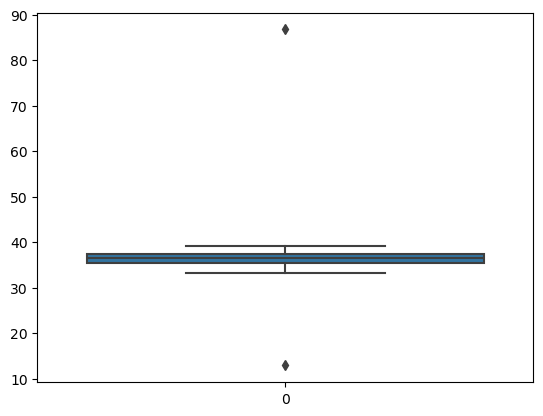

In [148]:
sns.boxplot(df['위도'])

<Axes: >

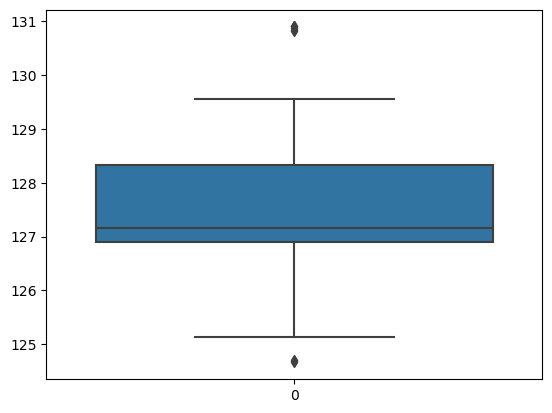

In [253]:
sns.boxplot(df['경도'])

In [ ]:
drop_list = np.concatenate((df[df['위도']>43].index, df[df['위도']<33].index, df[df['경도']>132].index), axis=0)
drop_list

In [213]:
center_point = df[['위도', '경도']].drop_duplicates()
kid_point = KID_2020[['위도', '경도']].copy()
kid_point = kid_point.dropna()

<Axes: >

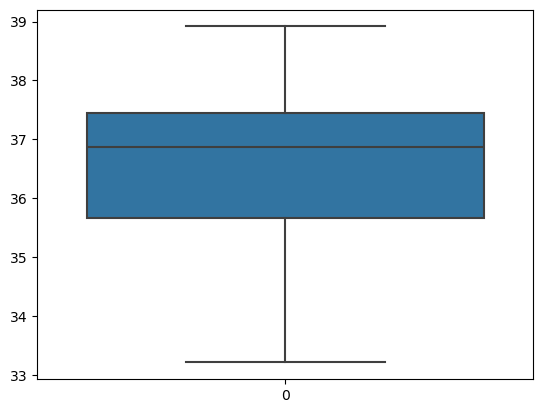

In [214]:
sns.boxplot(kid_point['위도'])

<Axes: >

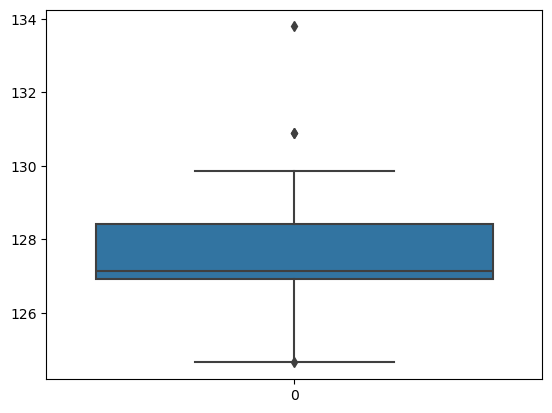

In [215]:
sns.boxplot(kid_point['경도'])

In [222]:
kid_point = kid_point.drop(kid_point[kid_point['경도'] > 132].index)
kid_point = kid_point.drop_duplicates()

<Axes: xlabel='위도', ylabel='경도'>

c:\Users\MingeeKim\AppData\Local\anaconda3\envs\fresh\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  func(*args, **kwargs)
c:\Users\MingeeKim\AppData\Local\anaconda3\envs\fresh\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
c:\Users\MingeeKim\AppData\Local\anaconda3\envs\fresh\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\MingeeKim\AppData\Local\anaconda3\envs\fresh\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\MingeeKim\AppData\Local\anaconda3\envs\fresh\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from curren

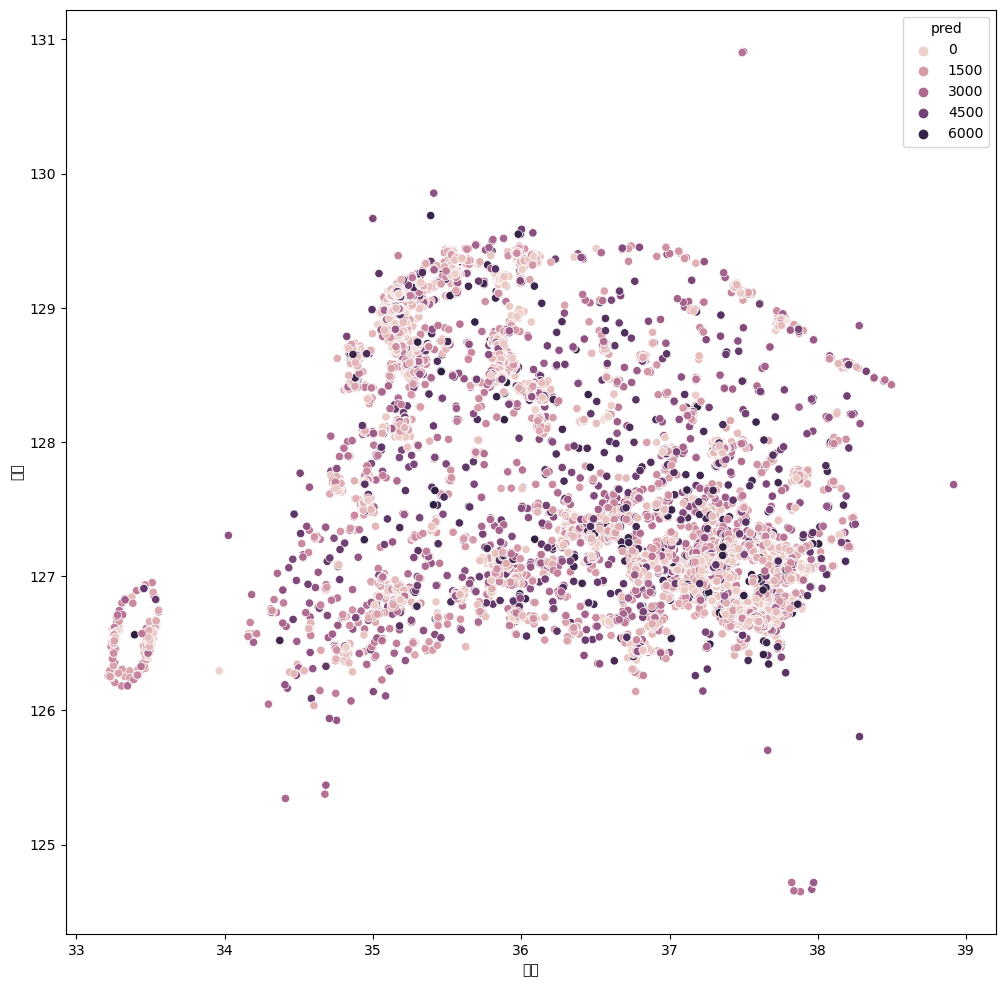

In [237]:
Real_Kmeans = KMeans(n_clusters=len(center_point))
Real_Kmeans.cluster_centers_ = np.array(center_point, order='C')
Real_Kmeans.fit(kid_point)
centers = Real_Kmeans.cluster_centers_
pred = Real_Kmeans.predict(kid_point)
kid_point['pred'] = pred

plt.figure(figsize=(12,12))
sns.scatterplot(x=kid_point['위도'], y=kid_point['경도'], hue=kid_point['pred'])
plt.scatter(centers[:,0], centers[:,1])

In [246]:
kid_point['pred'] == number

0        False
1        False
2        False
3        False
4        False
         ...  
48582    False
48583    False
48584    False
48585    False
48586    False
Name: pred, Length: 33461, dtype: bool

c:\Users\MingeeKim\AppData\Local\anaconda3\envs\fresh\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  func(*args, **kwargs)
c:\Users\MingeeKim\AppData\Local\anaconda3\envs\fresh\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
c:\Users\MingeeKim\AppData\Local\anaconda3\envs\fresh\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\MingeeKim\AppData\Local\anaconda3\envs\fresh\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\MingeeKim\AppData\Local\anaconda3\envs\fresh\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from curren

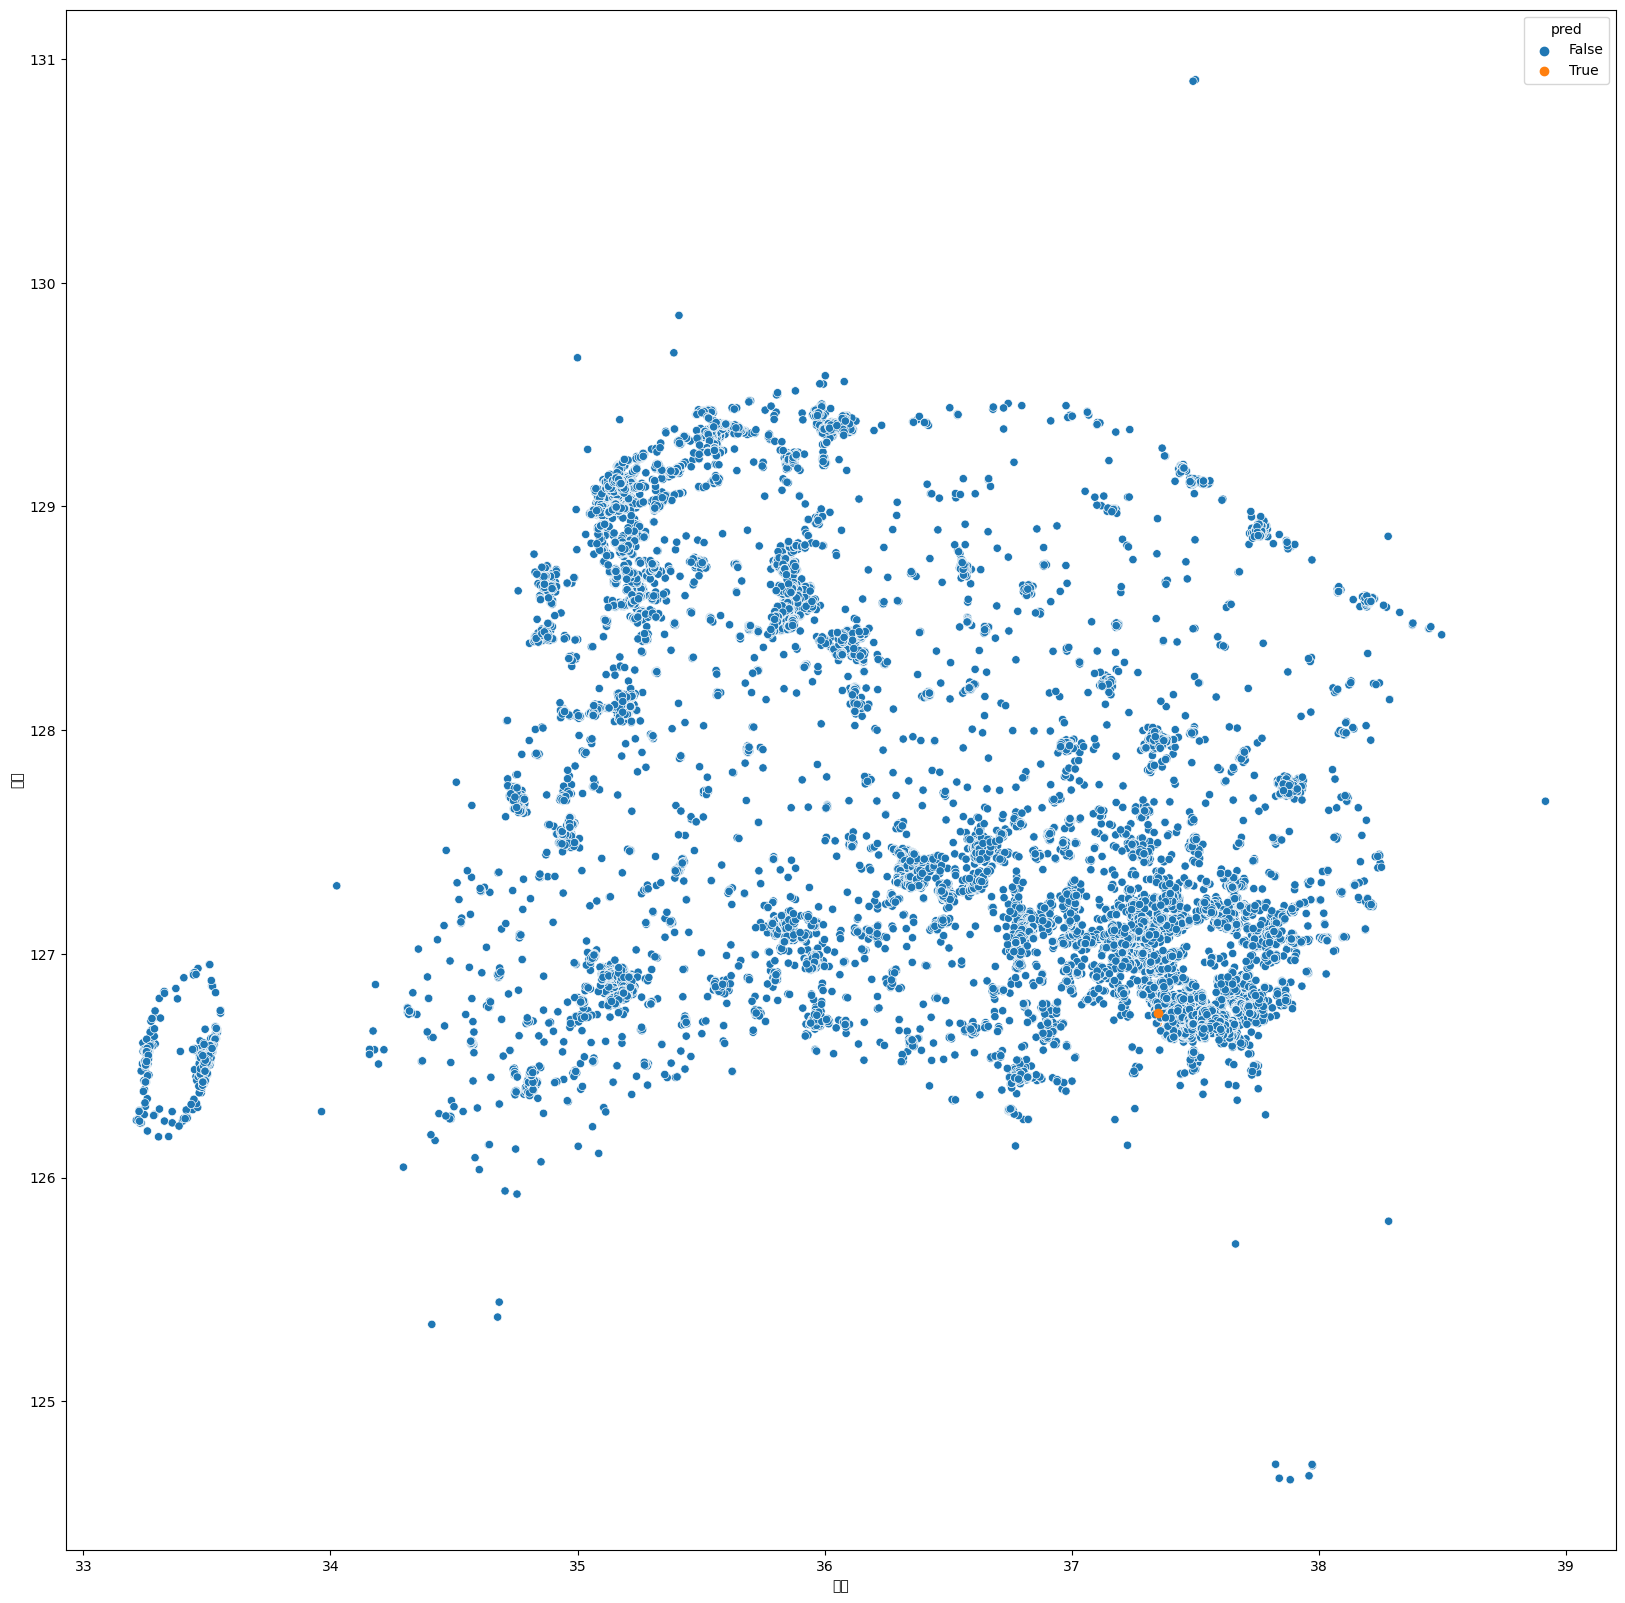

In [251]:
# 1개의 군집마다 파악하기
number = 2

plt.figure(figsize=(20,20))
sns.scatterplot(x=kid_point['위도'], y=kid_point['경도'], hue=(kid_point['pred'] == number))
plt.scatter(centers[number,0], centers[number,1], )

c:\Users\MingeeKim\AppData\Local\anaconda3\envs\fresh\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  func(*args, **kwargs)
c:\Users\MingeeKim\AppData\Local\anaconda3\envs\fresh\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
c:\Users\MingeeKim\AppData\Local\anaconda3\envs\fresh\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\MingeeKim\AppData\Local\anaconda3\envs\fresh\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\MingeeKim\AppData\Local\anaconda3\envs\fresh\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from curren

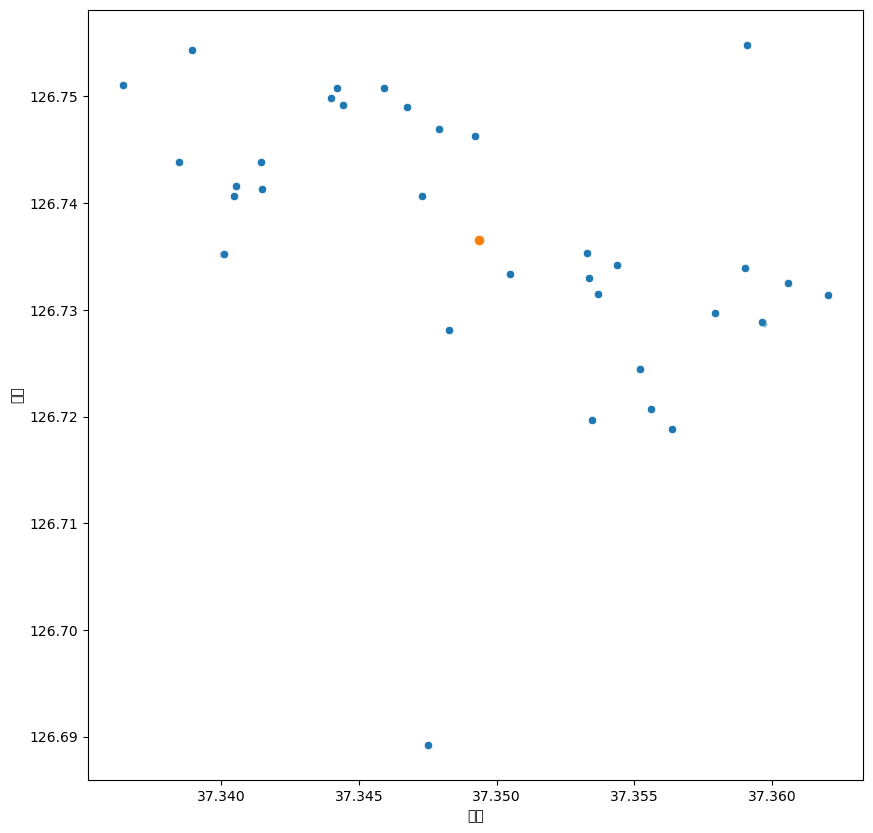

In [252]:
# 1개의 군집마다 파악하기
number = 2
condition = (kid_point['pred'] == number)

plt.figure(figsize=(10,10))
sns.scatterplot(x=kid_point[condition]['위도'], y=kid_point[condition]['경도'])
plt.scatter(centers[number,0], centers[number,1], )

In [228]:
centers.shape

(6208, 2)